# Streaming data visualization

### For the incoming climate data plot the line graph of air temperature against arrival time. You need to label some interesting points such as maximum and minimum values.

<IPython.core.display.Javascript object>


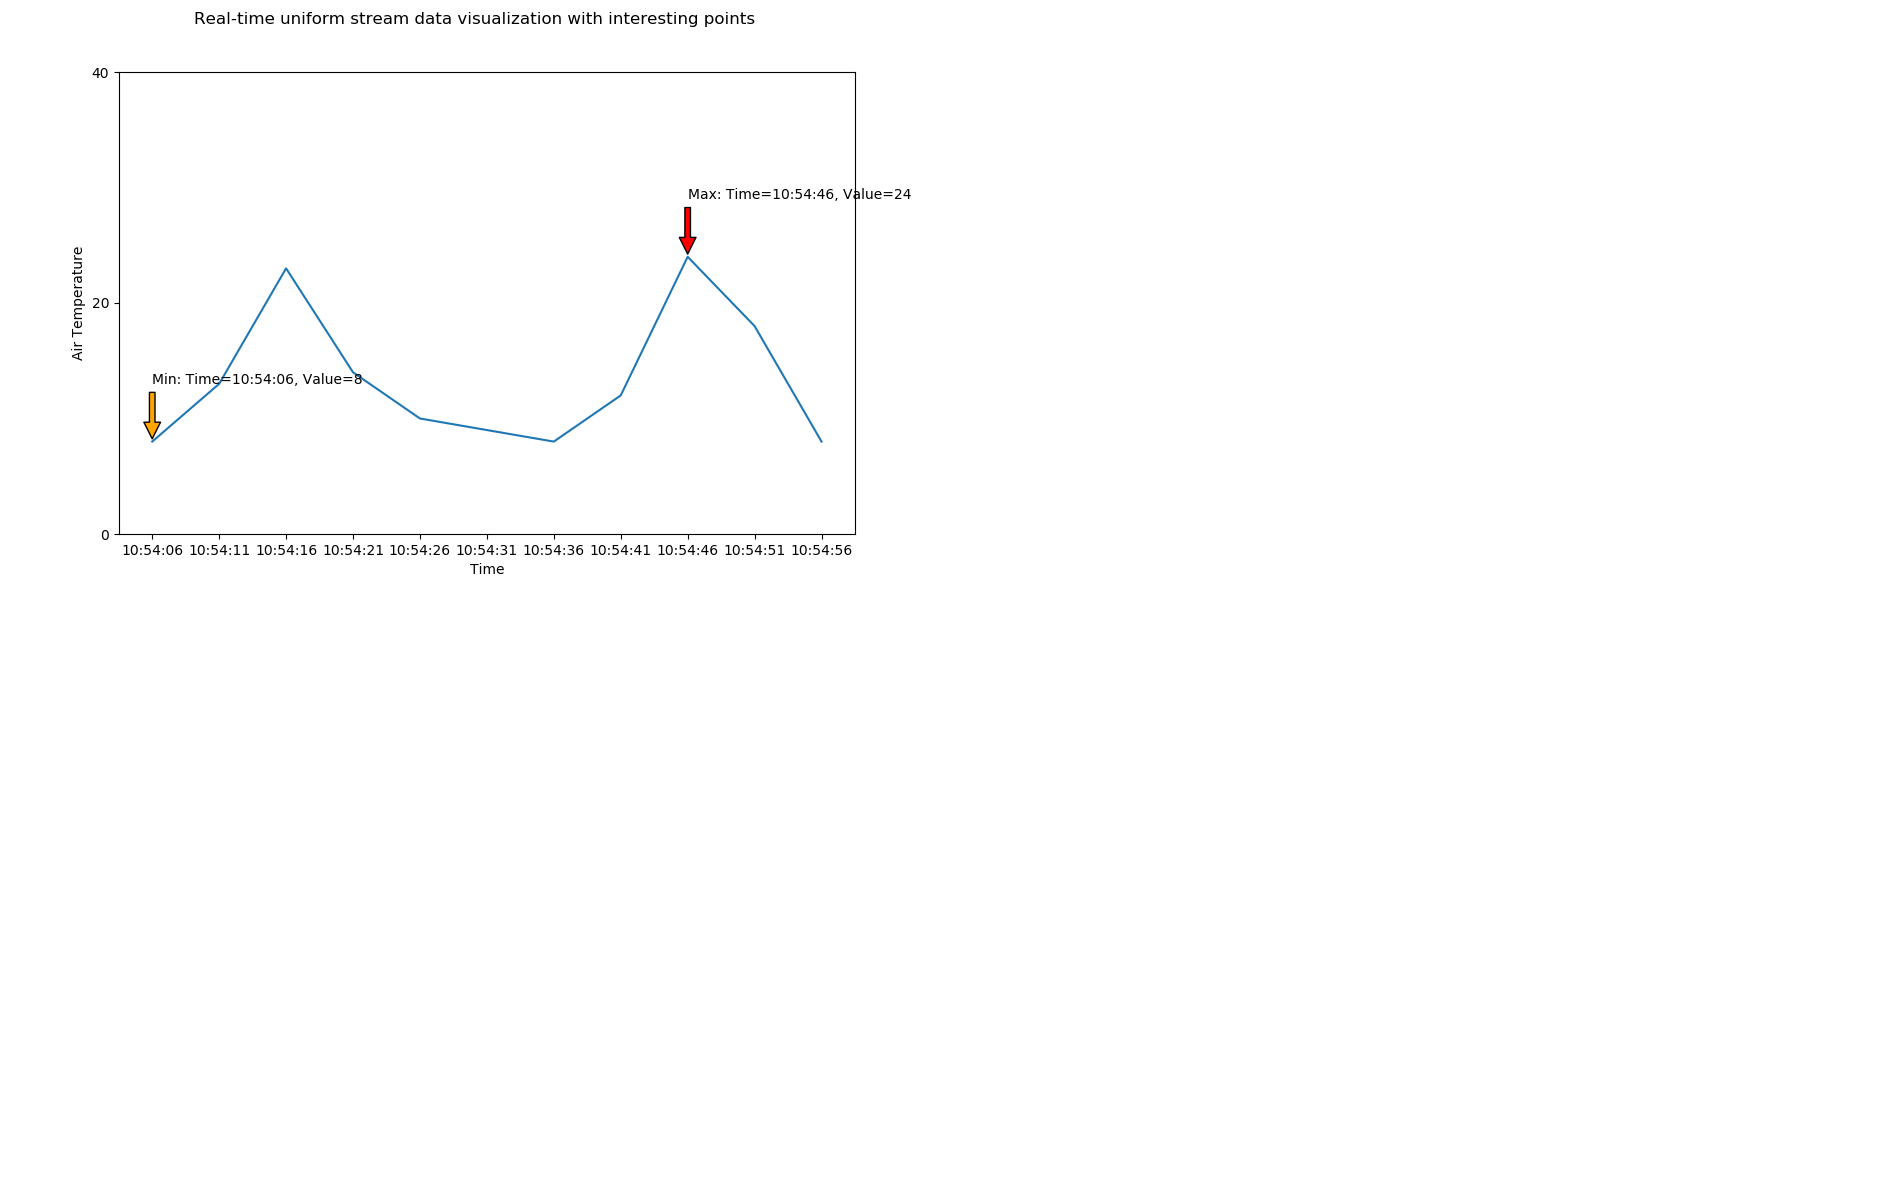

10:38:40
<class 'str'>
10:38:45
<class 'str'>
10:38:50
<class 'str'>
10:38:55
<class 'str'>
10:39:00
<class 'str'>
10:39:05
<class 'str'>
10:39:10
<class 'str'>
10:39:15
<class 'str'>
10:39:20
<class 'str'>
10:39:25
<class 'str'>
10:39:30
<class 'str'>
10:39:35
<class 'str'>
10:39:40
<class 'str'>
10:39:45
<class 'str'>
10:39:50
<class 'str'>
10:39:55
<class 'str'>
10:40:00
<class 'str'>
10:40:05
<class 'str'>
10:40:10
<class 'str'>
10:40:15
<class 'str'>
10:40:20
<class 'str'>
10:40:25
<class 'str'>
10:40:30
<class 'str'>
10:40:35
<class 'str'>
10:40:40
<class 'str'>
10:40:45
<class 'str'>
10:40:50
<class 'str'>
10:40:55
<class 'str'>
10:41:00
<class 'str'>
10:41:05
<class 'str'>
10:41:10
<class 'str'>
10:41:15
<class 'str'>
10:41:20
<class 'str'>
10:41:25
<class 'str'>
10:41:30
<class 'str'>
10:41:35
<class 'str'>
10:41:40
<class 'str'>
10:41:45
<class 'str'>
10:41:50
<class 'str'>
10:41:55
<class 'str'>
10:42:00
<class 'str'>
10:42:05
<class 'str'>
10:42:10
<class 'str'>
10:42:15
<c

In [ ]:
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib.pyplot as plt

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook



def annotate_max(x, y, ax = None):
    ymax = max(y)
    xpos = y.index(ymax)
    xmax = x[xpos]
    text = 'Max: Time={}, Value={}'.format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    ax.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax+5), arrowprops=dict(facecolor='red', shrink=0.05),)
    
def annotate_min(x, y, ax = None):
    ymin = min(y)
    xpos = y.index(ymin)
    xmin = x[xpos]
    text = 'Min: Time={}, Value={}'.format(xmin, ymin)
    if not ax:
        ax=plt.gca()
    ax.annotate(text, xy=(xmin, ymin), xytext=(xmin, ymin+5), arrowprops=dict(facecolor='orange', shrink=0.05),)

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization with interesting points') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Air Temperature')
        ax.set_ylim(0,40) 
        ax.set_yticks([0,20,40])
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
        
def connect_kafka_consumer():
    _consumer = None
    topic = "temperature_analysis"
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer
    
def consume_messages(consumer, fig, ax):
    """
    Perform operations on each batch
    :param iter: A list of elements from the batch
    :return:
    """
    try:
        # container for x and y values
        x, y = [], []
        # print('Waiting for messages')
        for message in consumer:
            data = eval(message.value.decode('utf-8'))
            if data["sender_id"] == "climate":
                time_split = data["created_time"].split("T")
                time = time_split[1]
                print(time)
                print(type(time))
                air_temperature = data["air_temperature_celcius"]
                x.append(time)
                y.append(air_temperature)
            # we start plotting only when we have 10 data points
            if len(y) > 10:
                ax.clear()
                ax.plot(x, y)
                ax.set_xlabel('Time')
                ax.set_ylabel('Air Temperature')
                ax.set_ylim(0,40) 
                ax.set_yticks([0,20,40])
                annotate_max(x,y)
                annotate_min(x,y)
                fig.canvas.draw()
                x.pop(0) # removing the item in the first position
                y.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
        
        
if __name__ == '__main__':
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)


# Static data visualization

### Records with the top 10 number of fires. Plot a bar chart with time as the x-axis and number of fires as the y-axis.

{'_id': {'year': 2019, 'dayOfYear': 143, 'hour': 20, 'interval': 30}, 'count': 9}
20:30
{'_id': {'year': 2019, 'dayOfYear': 144, 'hour': 10, 'interval': 40}, 'count': 6}
10:40
{'_id': {'year': 2019, 'dayOfYear': 143, 'hour': 20, 'interval': 35}, 'count': 3}
20:35
{'_id': {'year': 2019, 'dayOfYear': 144, 'hour': 10, 'interval': 35}, 'count': 3}
10:35
{'_id': {'year': 2019, 'dayOfYear': 143, 'hour': 19, 'interval': 40}, 'count': 3}
19:40
{'_id': {'year': 2019, 'dayOfYear': 144, 'hour': 10, 'interval': 45}, 'count': 2}
10:45
{'_id': {'year': 2019, 'dayOfYear': 143, 'hour': 20, 'interval': 10}, 'count': 2}
20:10
{'_id': {'year': 2019, 'dayOfYear': 143, 'hour': 19, 'interval': 35}, 'count': 2}
19:35


<IPython.core.display.Javascript object>


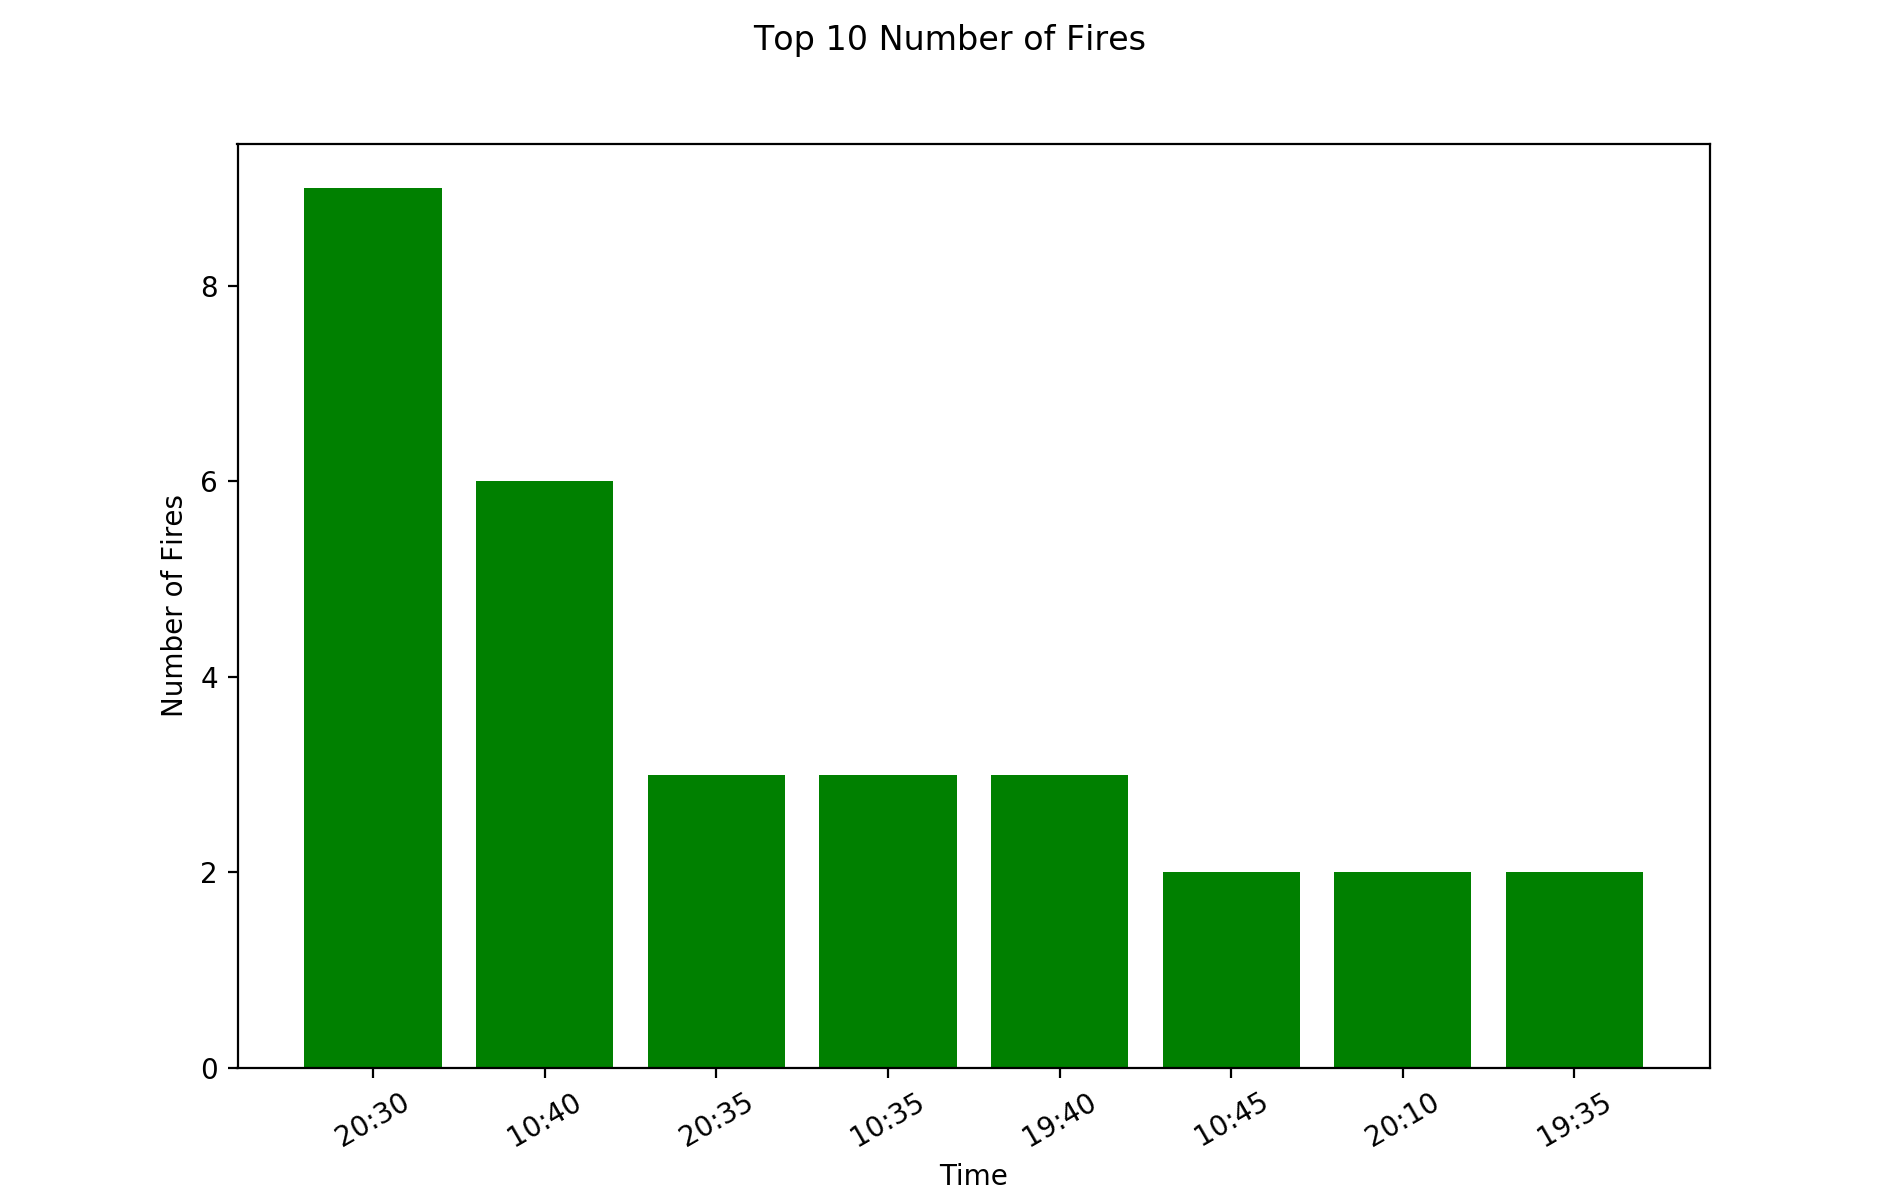

In [2]:
import pymongo
import datetime
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook


def find_top_ten():
    """
    connect to pymongo database,
    and get the number of fires
    """
    connection = pymongo.MongoClient("localhost", 27017)
    db = connection["fit5148_assignment_db"]

    records = db.hotspot_streaming.aggregate([
        {
            "$group": {
                "_id": {
                    "year": {"$year": "$created_time"},
                    "dayOfYear": {"$dayOfYear": "$created_time"},
                    "hour": {"$hour": "$created_time"},
                    "interval": {
                        "$subtract": [
                            {"$minute": "$created_time"},
                            {"$mod": [{"$minute": "$created_time"}, 5]}  # group by every 5 mins
                        ]
                    }
                },
                "count": {"$sum": 1}  # increment by 1
            },
        },
        {"$sort": {"count": -1}},  # sort by number of occurrences
        {"$limit": 10}  # only show 10 records
    ])

    connection.close()
    return list(records)


def plot_bar_chart():
    """
    Plot barchart with searched data from MongoDb
    """
    records = find_top_ten()
    y_axis = []  # y axis to plot
    x_axis = []  # x axis to plot
    for record in records:
        print(record)
        time = str(record['_id']['hour']) + ":" + str(record['_id']['interval'])
        print(time)
        x_axis.append(time)  # prepare for x plot
        y_axis.append(record["count"])  # prepare for x plot
        ind = np.arange(len(x_axis))  # make a index(0,9,1)
    width = 9.5  # width of fig
    height = 6  # height of figt
    fig = plt.figure(figsize=(width, height))  # create new figure
    ax = fig.add_subplot(111)  # create an ax
    ax.set_xlabel('Time')  # x label
    ax.set_ylabel('Number of Fires')  # y label
    ax.set_xticklabels(x_axis, rotation=30)
    fig.suptitle('Top 10 Number of Fires')  # giving figure a title
    ax.bar(x_axis, y_axis, color='green')  # plot bar chart
    fig.show()  # displaying the figure
    fig.canvas.draw()  # drawing on the canvas


plot_bar_chart()

### Plot fire locations in the map with air temperature, surface temperature, relative humidity and confidence.

***The code below requries ipywidgets and ipyleaflet to run. We had some issues with gmplot and hence use another package instead***

In [ ]:
import matplotlib.pyplot as plt
from ipywidgets import HTML
from ipyleaflet import Map, Marker, Popup
import pymongo
from pymongo import MongoClient
def search_from_db_for_map():
    """
    search relative hotspot information from mongodb
    """
    client = MongoClient()
    db = client.fit5148_assignment_db
    records = db.hotspot_streaming.aggregate([
        {
            "$lookup": {  # join climate_records and hotspot_records
                "from": "climate_streaming",
                "localField": "climate_id",
                "foreignField": "_id",
                "as": "climate_streaming"
            }
        },
    ])
    client.close()
    return records


def init_map():
    """
    initalize map
    """
    center = [-37.8147,143.1062]
    m = Map(center=center,zoom=6)
    return m

def add_markers_and_plot():
    m = init_map()
    hotspot_records = search_from_db_for_map()
    for record in hotspot_records:
        marker = Marker(location=(record["latitude"],record["longitude"]))
        message = HTML()
        popup_title = "surface temp: " + "<b>" + str(record["surface_temperature_celcius"])\
        + "</b>" +", confidence: "+"<b>" + str(record["confidence"]) +"</b>"+ ", air temp: " \
        + "<b>"+str(record["climate_streaming"][0]["air_temperature_celcius"]) +"</b>"+", relative humidity: " + \
        "<b>"+str(record["climate_streaming"][0]['relative_humidity'])+"</b>"
        message.value = popup_title
        marker.popup = message
        m.add_layer(marker)
    return m


# Popup associated to a layer
add_markers_and_plot()

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …